<a href="https://colab.research.google.com/github/VaggelisApostolou/auth-dws-ml-2025/blob/main/ML_Exercise7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import string

# **Ερωτήματα**

## *Ερώτημα 1*

Μέγεθος Train set: 6851
Μέγεθος Test set: 762


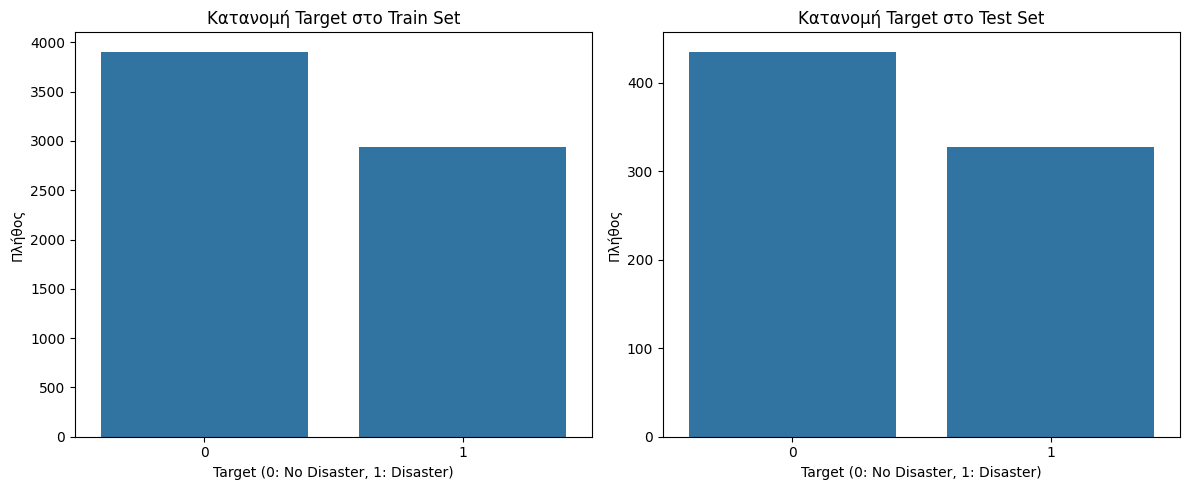


Αναλογία στο Train set:
target
0    0.570282
1    0.429718
Name: proportion, dtype: float64


In [ ]:
df = pd.read_csv('train.csv')
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.10,
    stratify=y,
    random_state=0
)
print(f"Μέγεθος Train set: {len(X_train)}")
print(f"Μέγεθος Test set: {len(X_test)}")
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title('Κατανομή Target στο Train Set')
ax[0].set_xlabel('Target (0: No Disaster, 1: Disaster)')
ax[0].set_ylabel('Πλήθος')
sns.countplot(x=y_test, ax=ax[1])
ax[1].set_title('Κατανομή Target στο Test Set')
ax[1].set_xlabel('Target (0: No Disaster, 1: Disaster)')
ax[1].set_ylabel('Πλήθος')
plt.tight_layout()
plt.show()
print("\nΑναλογία στο Train set:")
print(y_train.value_counts(normalize=True))

Το dataset είναι αρκετά ισορροπημένο, αλλά όχι πλήρως.

## *Ερώτημα 2*

In [ ]:
X_train = X_train.copy()
X_test = X_test.copy()
X_train = X_train.drop(['id', 'location'], axis=1, errors='ignore')
X_test = X_test.drop(['id', 'location'], axis=1, errors='ignore')
X_train['keyword'] = X_train['keyword'].fillna('null')
X_test['keyword'] = X_test['keyword'].fillna('null')
X_train['inputs'] = X_train['keyword'] + ' ' + X_train['text']
X_test['inputs'] = X_test['keyword'] + ' ' + X_test['text']

## *Ερώτημα 3*

In [ ]:
import techniques
def clean_text_with_repo(text):
    """
    Συνάρτηση που χρησιμοποιεί τις έτοιμες μεθόδους του techniques.py
    σε συνδυασμό με βασικό καθαρισμό θορύβου.
    """
    # 1. Αφαίρεση Unicode (emojis, σύμβολα)
    text = techniques.removeUnicode(text)

    # 2. Αφαίρεση URLs
    # Η replaceURL του repo αφαιρεί τα links
    text = techniques.replaceURL(text)

    # 3. Αφαίρεση User Mentions (@user)
    text = techniques.replaceAtUser(text)

    # 4. Διαχείριση Hashtags
    # Η removeHashtagInFrontOfWord αφαιρεί το '#' αλλά κρατάει τη λέξη (π.χ. #fire -> fire)
    text = techniques.removeHashtagInFrontOfWord(text)

    # 5. Αφαίρεση επιπλέον θορύβου (σημεία στίξης & αριθμοί)
    # Αφαίρεση αριθμών
    text = re.sub(r'\d+', '', text)
    # Αφαίρεση σημείων στίξης
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)

    # 6. Lowercase και αφαίρεση κενών
    text = text.lower().strip()
    text = re.sub(r'\s+', ' ', text)

    return text
X_train['inputs'] = X_train['inputs'].apply(clean_text_with_repo)
X_test['inputs'] = X_test['inputs'].apply(clean_text_with_repo)

## *Ερώτημα 4*

In [ ]:
train_inputs = X_train['inputs'].to_numpy()
test_inputs = X_test['inputs'].to_numpy()
train_targets = y_train.to_numpy()
test_targets = y_test.to_numpy()
print("Shape of Train Inputs:", train_inputs.shape)
print("Shape of Train Targets:", train_targets.shape)
print("Shape of Test Inputs:", test_inputs.shape)
print("Shape of Test Inputs:", test_targets.shape)

Shape of Train Inputs: (6851,)
Shape of Train Targets: (6851,)
Shape of Test Inputs: (762,)
Shape of Test Inputs: (762,)


## *Ερώτημα 5*

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_inputs)
X_test_tfidf = tfidf_vectorizer.transform(test_inputs)
print("Η μετατροπή ολοκληρώθηκε.")
print(f"Διαστάσεις Train set (γραμμές, λέξεις): {X_train_tfidf.shape}")
print(f"Διαστάσεις Test set (γραμμές, λέξεις): {X_test_tfidf.shape}")

Η μετατροπή ολοκληρώθηκε.
Διαστάσεις Train set (γραμμές, λέξεις): (6851, 13932)
Διαστάσεις Test set (γραμμές, λέξεις): (762, 13932)


## *Ερώτημα 6*

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
svc_model = LinearSVC(random_state=0)
svc_model.fit(X_train_tfidf, y_train)
y_train_pred = svc_model.predict(X_train_tfidf)
y_test_pred = svc_model.predict(X_test_tfidf)
def print_metrics(y_true, y_pred, set_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{set_name} Set Metrics")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("\n")
print_metrics(y_train, y_train_pred, "Train")
print_metrics(y_test, y_test_pred, "Test")

Train Set Metrics
Accuracy:  0.9657
Precision: 0.9781
Recall:    0.9412
F1 Score:  0.9593


Test Set Metrics
Accuracy:  0.8005
Precision: 0.7907
Recall:    0.7278
F1 Score:  0.7580




Πιο σημαντική μετρική είναι το Recall (ή το F1 για ισορροπία), διότι στο πλαίσιο της πολιτικής προστασίας, η αποτυχία εντοπισμού μιας πραγματικής φυσικής καταστροφής (False Negative) μπορεί να έχει τραγικές συνέπειες για ανθρώπινες ζωές, επομένως θέλουμε να ελαχιστοποιήσουμε αυτές τις περιπτώσεις. Επίσης, σημαντική είναι και η F1 για λόγους ισορροπίας.

## *Ερώτημα 7*

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()
pca = PCA(n_components=0.95, random_state=0)
print("PCA")
X_train_pca = pca.fit_transform(X_train_dense)
X_test_pca = pca.transform(X_test_dense)
print(f"Διαστάσεις ΠΡΙΝ: {X_train_dense.shape}")
print(f"Διαστάσεις ΜΕΤΑ: {X_train_pca.shape}")

print("LinearSVC")
linear_svc = LinearSVC(random_state=0)
linear_svc.fit(X_train_pca, y_train)
y_pred_linear = linear_svc.predict(X_test_pca)
print("Αποτελέσματα LinearSVC:")
print(classification_report(y_test, y_pred_linear, digits=4))

print("SVC (RBF)")
rbf_svc = SVC(kernel='rbf', random_state=0)
rbf_svc.fit(X_train_pca, y_train)
y_pred_rbf = rbf_svc.predict(X_test_pca)
print("Αποτελέσματα SVC (RBF):")
print(classification_report(y_test, y_pred_rbf, digits=4))

PCA
Διαστάσεις ΠΡΙΝ: (6851, 13932)
Διαστάσεις ΜΕΤΑ: (6851, 3831)
LinearSVC
Αποτελέσματα LinearSVC:
              precision    recall  f1-score   support

           0     0.8170    0.8621    0.8389       435
           1     0.8020    0.7431    0.7714       327

    accuracy                         0.8110       762
   macro avg     0.8095    0.8026    0.8052       762
weighted avg     0.8106    0.8110    0.8100       762

SVC (RBF)
Αποτελέσματα SVC (RBF):
              precision    recall  f1-score   support

           0     0.8137    0.8736    0.8426       435
           1     0.8136    0.7339    0.7717       327

    accuracy                         0.8136       762
   macro avg     0.8136    0.8038    0.8071       762
weighted avg     0.8136    0.8136    0.8122       762



## *Ερώτημα 8*

Σύμφωνα με την τεκμηρίωση του Scikit-Learn (SVM):
1.   gamma='scale' (Default): Η τιμή υπολογίζεται ως: $1 / (n\_features \times X.var())$. Δηλαδή, λαμβάνει υπόψη τη διακύμανση (variance) των δεδομένων. Είναι συνήθως η προτιμώμενη επιλογή γιατί προσαρμόζεται καλύτερα όταν τα χαρακτηριστικά δεν έχουν κανονικοποιηθεί πλήρως.
2.   gamma='auto': Η τιμή υπολογίζεται ως: $1 / n\_features$. Είναι η παλαιότερη default επιλογή. Είναι πιο απλή, αλλά συχνά λιγότερο αποδοτική αν τα δεδομένα έχουν διαφορετικές κλίμακες.

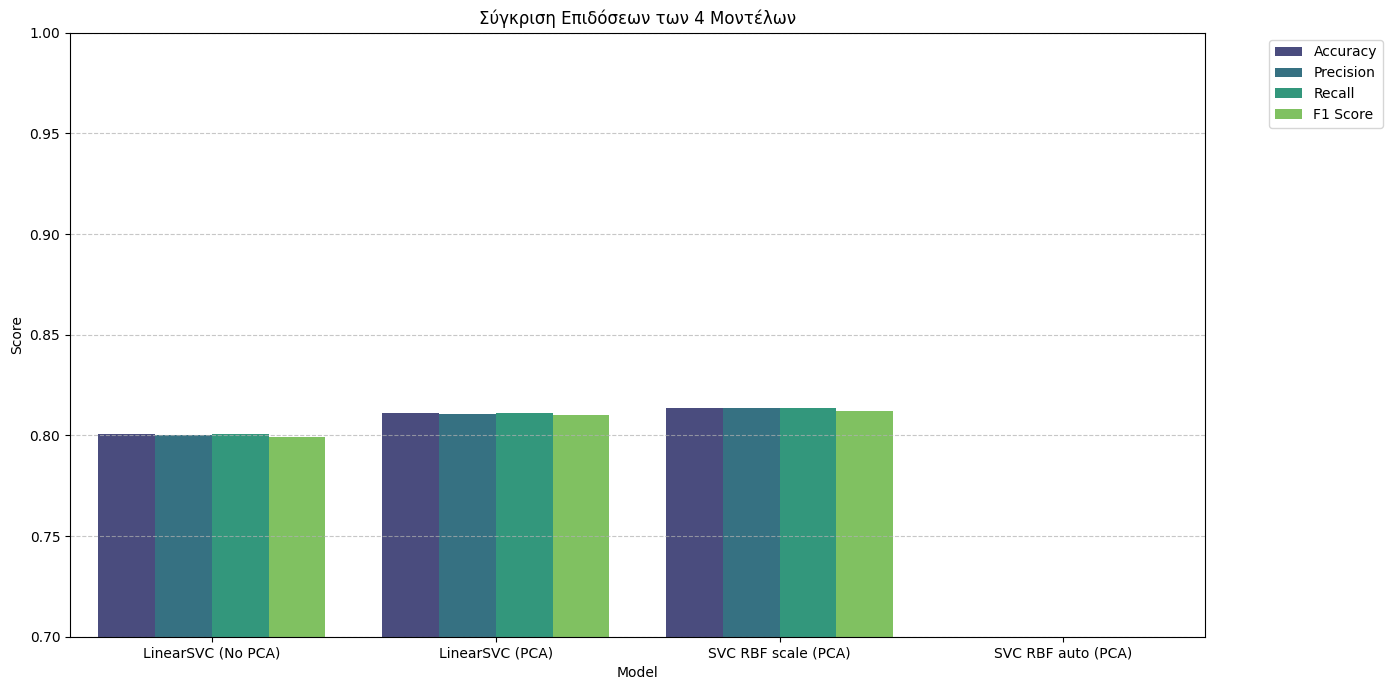


Αναλυτικός Πίνακας Αποτελεσμάτων:
                 Model  Accuracy  Precision    Recall  F1 Score
0   LinearSVC (No PCA)  0.800525   0.799971  0.800525  0.799290
1      LinearSVC (PCA)  0.811024   0.810551  0.811024  0.809961
2  SVC RBF scale (PCA)  0.813648   0.813642  0.813648  0.812160
3   SVC RBF auto (PCA)  0.570866   0.325888  0.570866  0.414915


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
svc_auto = SVC(kernel='rbf', gamma='auto', random_state=0)
svc_auto.fit(X_train_pca, y_train)
y_pred_auto = svc_auto.predict(X_test_pca)
models_data = [
    ("LinearSVC (No PCA)", y_test_pred),      # Από Ερώτημα 6
    ("LinearSVC (PCA)", y_pred_linear),       # Από Ερώτημα 7
    ("SVC RBF scale (PCA)", y_pred_rbf),      # Από Ερώτημα 7
    ("SVC RBF auto (PCA)", y_pred_auto)       # Από Ερώτημα 8
]
results = []
for name, preds in models_data:
    acc = accuracy_score(y_test, preds)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, preds, average='weighted', zero_division=0)
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })
df_results = pd.DataFrame(results)
df_melted = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(14, 7))
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="viridis")
plt.title("Σύγκριση Επιδόσεων των 4 Μοντέλων")
plt.ylim(0.7, 1.0) # Zoom στο 70%-100% για να φανούν οι διαφορές
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("\nΑναλυτικός Πίνακας Αποτελεσμάτων:")
print(df_results)

## *Ερώτημα 9*

In [ ]:
from sklearn.naive_bayes import GaussianNB

X_train_dense_full = X_train_tfidf.toarray()
X_test_dense_full = X_test_tfidf.toarray()
gnb = GaussianNB()
gnb.fit(X_train_dense_full, y_train)
y_pred_gnb = gnb.predict(X_test_dense_full)
print("Αποτελέσματα Gaussian Naive Bayes")
acc = accuracy_score(y_test, y_pred_gnb)
prec = precision_score(y_test, y_pred_gnb)
rec = recall_score(y_test, y_pred_gnb)
f1 = f1_score(y_test, y_pred_gnb)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

Αποτελέσματα Gaussian Naive Bayes
Accuracy:  0.6207
Precision: 0.5393
Recall:    0.7982
F1 Score:  0.6436
